**1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.**

**2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.**

**3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.**

**4. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).**

## 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
## 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [32]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [33]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

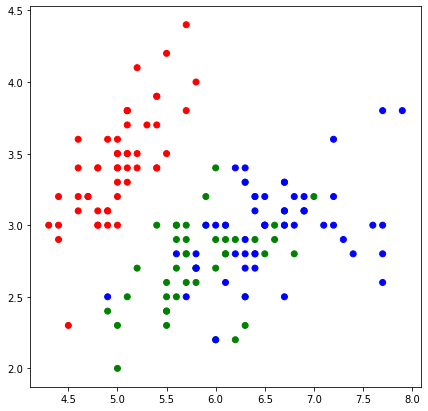

In [35]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [36]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

## Реализуем алгоритм поиска k ближайших соседей. Изменим фунцию с добавлением весов по формуле w(i)=q^i ,  q∈(0,1) ;

In [318]:
def knn_index(x_train, y_train, x_test, k, q):
    
    answers = []
   
    for x in x_test:
        # ИНДЕКС БУДЕМ ОБНУЛЯТЬ ПРИ НОВОМ ЦИКЛЕ
        index = 0
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        
        
        #ИЗМЕНИМ ЦИКЛ СОГЛАСНО ФОРМУЛЕ w(i)=q*i ,  q∈(0,1) ;
        for d in sorted(test_distances)[0:k]:
            index += 1
            w = q**index
            classes[d[1]] += d[0]*w
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

 ## Изменим фунцию с добавлением весов в зависимостри от расстояния по формуле w(d)=q^d , q∈(0,1);

In [326]:
def knn_distance(x_train, y_train, x_test, k, q):
    
    answers = []
   
    for x in x_test:

        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        
        
        #ИЗМЕНИМ ЦИКЛ СОГЛАСНО ФОРМУЛЕ w(i)=q*i ,  q∈(0,1) ;
        for d in sorted(test_distances)[0:k]:
            w = q**d[1]
            classes[d[1]] += d[0]*w
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [295]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Как я понимаю, реализация весов 

Проверим работу алгоритма при различных k

In [333]:
q = 0.8# (от 0 до 1)
k = 5
y_pred = knn_index(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')



Точность алгоритма при k = 5: 0.833


In [337]:
q = 0.8# (от 0 до 1)
k = 5
y_pred = knn_distance(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')



Точность алгоритма при k = 5: 0.867


## 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

Точность алгоритма в зависимости от индекса    при k = 0: 0.200
Точность алгоритма в зависимости от расстояния при k = 0: 0.200
Точность алгоритма в зависимости от индекса    при k = 1: 0.467
Точность алгоритма в зависимости от расстояния при k = 1: 0.467
Точность алгоритма в зависимости от индекса    при k = 2: 0.667
Точность алгоритма в зависимости от расстояния при k = 2: 0.667
Точность алгоритма в зависимости от индекса    при k = 3: 0.700
Точность алгоритма в зависимости от расстояния при k = 3: 0.700
Точность алгоритма в зависимости от индекса    при k = 4: 0.733
Точность алгоритма в зависимости от расстояния при k = 4: 0.733
Точность алгоритма в зависимости от индекса    при k = 5: 0.833
Точность алгоритма в зависимости от расстояния при k = 5: 0.833
Точность алгоритма в зависимости от индекса    при k = 6: 0.867
Точность алгоритма в зависимости от расстояния при k = 6: 0.867
Точность алгоритма в зависимости от индекса    при k = 7: 0.800
Точность алгоритма в зависимости от расс

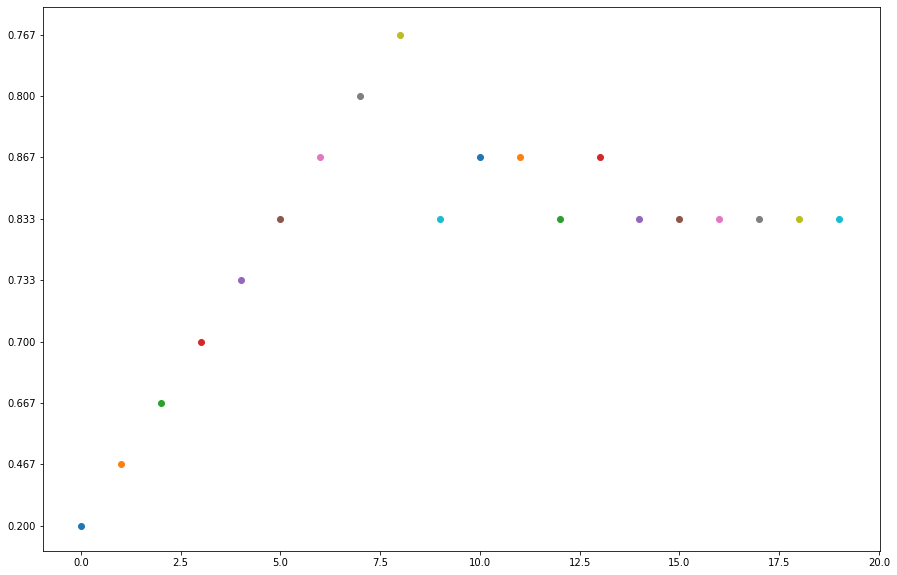

In [381]:
q = 0.8 # (от 0 до 1)
k = [i for i in range(0, 20)]
plt.figure(figsize=(15, 10))
sort = []
sort1 = 1
for i in k:    
    y_pred = knn_index(X_train, y_train, X_test, i, q)
    sort.append(accuracy(y_pred, y_test))
    print(f'Точность алгоритма в зависимости от индекса    при k = {i}: {accuracy(y_pred, y_test):.3f}')
    print(f'Точность алгоритма в зависимости от расстояния при k = {i}: {accuracy(y_pred, y_test):.3f}')
    plt.scatter(i, f'{accuracy(y_pred, y_test):.3f}')
print(sorted(sort)[-1])


    


Точность алгоритма в зависимости от индекса    при k = 0: 0.200
Точность алгоритма в зависимости от расстояния при k = 0: 0.200
Точность алгоритма в зависимости от индекса    при k = 1: 0.467
Точность алгоритма в зависимости от расстояния при k = 1: 0.467
Точность алгоритма в зависимости от индекса    при k = 2: 0.700
Точность алгоритма в зависимости от расстояния при k = 2: 0.700
Точность алгоритма в зависимости от индекса    при k = 3: 0.767
Точность алгоритма в зависимости от расстояния при k = 3: 0.767
Точность алгоритма в зависимости от индекса    при k = 4: 0.733
Точность алгоритма в зависимости от расстояния при k = 4: 0.733
Точность алгоритма в зависимости от индекса    при k = 5: 0.867
Точность алгоритма в зависимости от расстояния при k = 5: 0.867
Точность алгоритма в зависимости от индекса    при k = 6: 0.867
Точность алгоритма в зависимости от расстояния при k = 6: 0.867
Точность алгоритма в зависимости от индекса    при k = 7: 0.833
Точность алгоритма в зависимости от расс

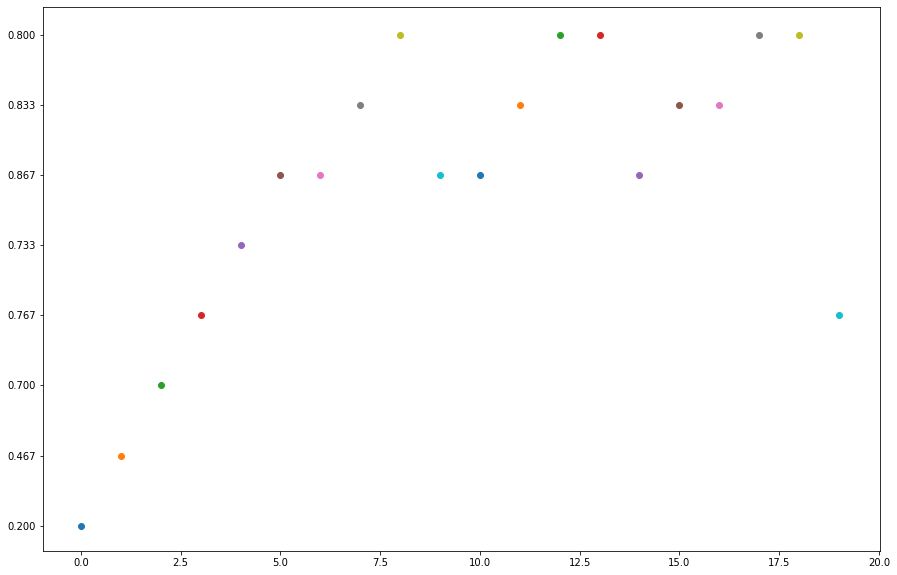

In [382]:
q = 0.8# (от 0 до 1)
k = [i for i in range(0, 20)]
plt.figure(figsize=(15, 10))
sort_knn_distance = []
for i in k:    
    y_pred = knn_distance(X_train, y_train, X_test, i, q)
    sort_knn_distance.append(accuracy(y_pred, y_test))
    print(f'Точность алгоритма в зависимости от индекса    при k = {i}: {accuracy(y_pred, y_test):.3f}')
    print(f'Точность алгоритма в зависимости от расстояния при k = {i}: {accuracy(y_pred, y_test):.3f}')
    plt.scatter(i, f'{accuracy(y_pred, y_test):.3f}')
    sort_knn_distance
print(sorted(sort_knn_distance)[-1])
    


То ли что-то нахимичил: получается максимальная точность и в одном и в другом слуваях = 0.86. Результаты хоть и разняться, но немного. Выведем все в одном цикле:

In [395]:
q = np.linspace(0, 1, 10)
k = [i for i in range(0, 10)]
plt.figure(figsize=(15, 10))
sort_knn_distance = []
for _q in q:
    for i in k:    
        y_pred = knn_index(X_train, y_train, X_test, i, _q)
        y_pred1 = knn_distance(X_train, y_train, X_test, i, _q)

        print(f'Точность алгоритма в зависимости от индекса    при k = {i} и q = {_q}: {accuracy(y_pred, y_test):.3f}')
        print(f'Точность алгоритма в зависимости от расстояния при k = {i} и q = {_q}: {accuracy(y_pred1, y_test):.3f}')


Точность алгоритма в зависимости от индекса    при k = 0 и q = 0.0: 0.200
Точность алгоритма в зависимости от расстояния при k = 0 и q = 0.0: 0.200
Точность алгоритма в зависимости от индекса    при k = 1 и q = 0.0: 0.200
Точность алгоритма в зависимости от расстояния при k = 1 и q = 0.0: 0.400
Точность алгоритма в зависимости от индекса    при k = 2 и q = 0.0: 0.200
Точность алгоритма в зависимости от расстояния при k = 2 и q = 0.0: 0.567
Точность алгоритма в зависимости от индекса    при k = 3 и q = 0.0: 0.200
Точность алгоритма в зависимости от расстояния при k = 3 и q = 0.0: 0.567
Точность алгоритма в зависимости от индекса    при k = 4 и q = 0.0: 0.200
Точность алгоритма в зависимости от расстояния при k = 4 и q = 0.0: 0.567
Точность алгоритма в зависимости от индекса    при k = 5 и q = 0.0: 0.200
Точность алгоритма в зависимости от расстояния при k = 5 и q = 0.0: 0.567
Точность алгоритма в зависимости от индекса    при k = 6 и q = 0.0: 0.200
Точность алгоритма в зависимости от ра

<Figure size 1080x720 with 0 Axes>

## В моем случае получается:
Точность в зависимости от расстояния максимальна при:

k = 6 и q = 0.5555555555555556: 0.900

k = 5 и q = 0.8888888888888888: 0.900

k = 5 и q = 1.0: 0.900

Точность в зависимости от индекса максимальна при:

k = 5 и q = 1.0: 0.900


## 4. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [396]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

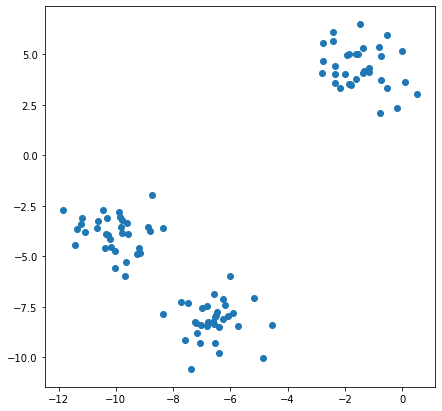

In [398]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [399]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [437]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [479]:
def msc(old_centroids, classes):
    list1 = []
    for i in range(len(old_centroids)):
        for element in classes[i]:
            list1.append(e_metrics(old_centroids[i], element))
    return np.mean(list1)
    

In [480]:
centroids, classes = kmeans(X,3, max_iterations, min_distance)
meann = msc(centroids, classes)
meann

1.2793062345078632

In [485]:
k = [i for i in range(1,11)]
def claster_qualety(data, k, max_iterations, min_distance):
    list_of_e_metrics = []
    for _k in k:
        centroids, classes = kmeans(X, _k, max_iterations, min_distance)
        mean = msc(centroids, classes)
        list_of_e_metrics.append(mean)
    return k, list_of_e_metrics
k, list_of_e_metrics = claster_qualety(X, k, max_iterations, min_distance)

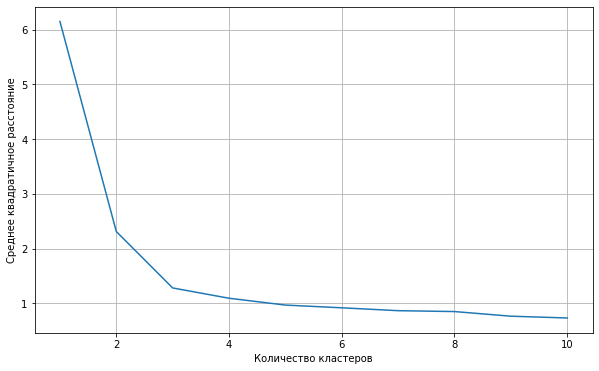

In [486]:
plt.figure(figsize=(10, 6))
plt.plot(k, list_of_e_metrics)
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее квадратичное расстояние')
plt.grid()
plt.show()